**This script contains the following points:**

    1. Importing libraries
    2. Importing data
    3. Visualizing data
        3.1 Bar chart
        3.2 Histogram
        3.3 Scatterplot
        3.4 Line chart
            Split the dataframe
            Create a line chart

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 4/01-2024_Instacart_Basket_Analysis'

In [3]:
# Import "orders_products_merged(3).pkl"
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_merged(3).pkl'))

In [4]:
df_ords_prods_merged.shape

(32404859, 23)

# 3. Visualizing data

## 3.1 Bar chart

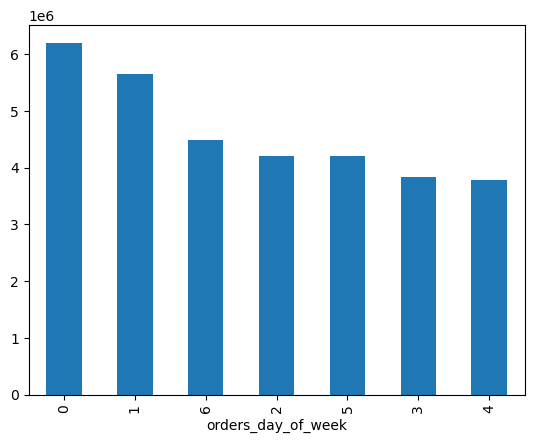

In [5]:
# Create a bar chart
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

## 3.2 Histogram

In [6]:
# Locate outliers
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,High-range product,Busiest day,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,High-range product,Busiest day,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,High-range product,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,High-range product,Busiest day,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,High-range product,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,High-range product,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [7]:
# Mark outliers NaN
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100, 'prices'] = np.nan

In [8]:
# Check the output
df_ords_prods_merged['prices'].max()

25.0

In [9]:
df_ords_prods_merged.shape

(32404859, 23)

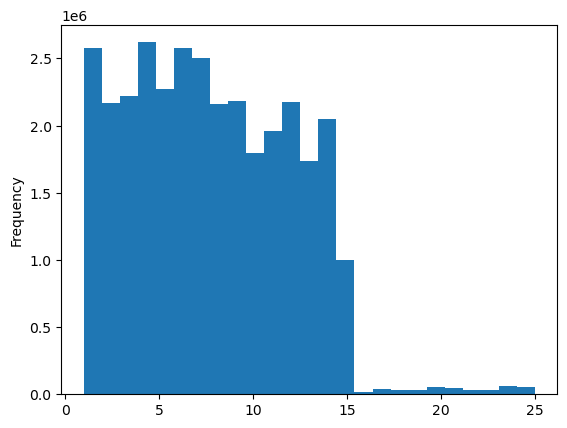

In [10]:
# Create a histogram
hist = df_ords_prods_merged['prices'].plot.hist(bins = 25)

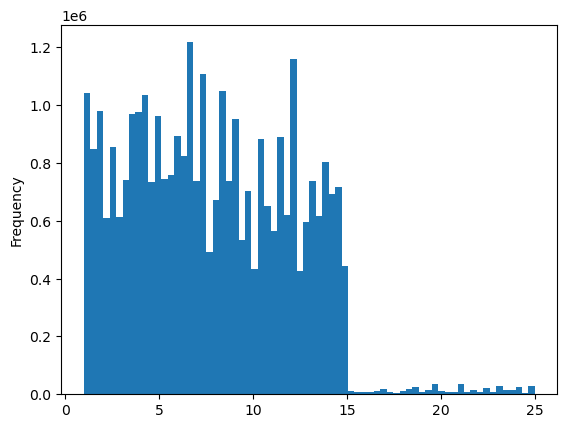

In [11]:
hist_2 = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [12]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_hist_prods_prices.png'))

## 3.3 Scatterplot

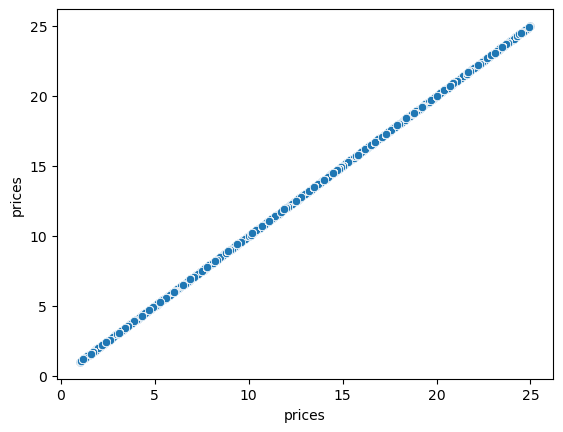

In [13]:
# Create a scatterplot
scat = sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

## 3.4 Line chart

### Split the dataframe

In [14]:
# Create a sample set at 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [15]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged[~dev]

In [17]:
# Check the output
len(df_ords_prods_merged)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
# Create subset of dataframe small
small_sub = small[['orders_day_of_week','prices']]

In [20]:
# Check the output
small_sub.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


### Create a line chart

/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


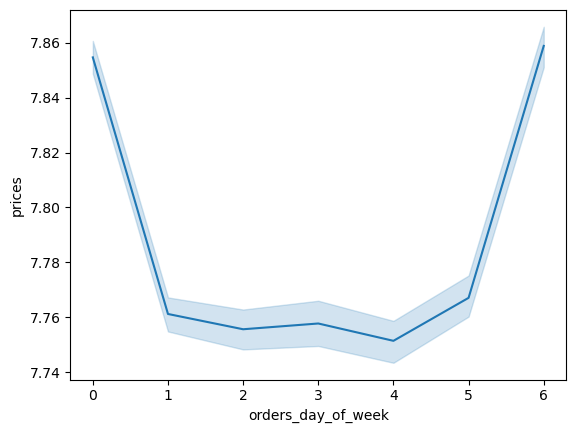

In [21]:
# Create a line chart
line = sns.lineplot(data = small_sub, x = 'orders_day_of_week', y = 'prices')